<h1><b>Data Exploration</b></h1>

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [49]:
df=pd.read_csv("student_scores.csv")

In [50]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [51]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   125 non-null    float64
 1   Scores  125 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [53]:
df.memory_usage()

Index      128
Hours     1000
Scores    1000
dtype: int64

In [54]:
df.memory_usage().sum()

2128

In [55]:
df.describe()

,Hours,Scores
count,125.000000,125.000000
mean,5.284800,53.544000
std,2.179304,21.105535
min,1.100000,17.000000
25%,3.300000,35.000000
50%,5.000000,51.000000
75%,7.300000,72.000000
max,9.200000,95.000000


<h2>Statistical moments</h2>
Mean (1st moment) <br>
Variance (2nd moment) <br>
Skewness (3rd moment) <br>
Kurtosis (4th moment) <br>

In [56]:
df.mean()

Hours      5.2848
Scores    53.5440
dtype: float64

In [57]:
df['Scores'].mean()

53.544

In [58]:
df.var()

Hours       4.749364
Scores    445.443613
dtype: float64

<h2>Skewness</h2>
Skewness is the measure of the symmetry of a distribution compared to standard normal distribution<br>    
+ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.<br>
0 - symmetric<br>
-ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [59]:
df.skew()

Hours     0.063809
Scores    0.102628
dtype: float64

<h2>Kurtosis</h2>
Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.<br>
+ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)
0 - Mesokurtic (normal dist.)<br>
-ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution<br>

In [60]:
df.kurtosis()

Hours    -1.257843
Scores   -1.287994
dtype: float64

<b>min / max / median</b>

In [61]:
df.min()

Hours      1.1
Scores    17.0
dtype: float64

In [62]:
df.max()

Hours      9.2
Scores    95.0
dtype: float64

In [63]:
df.median()

Hours      5.0
Scores    51.0
dtype: float64

<h2>Correlation</h2>

In [64]:
df.corr()

,Hours,Scores
Hours,1.000000,0.987167
Scores,0.987167,1.000000


<AxesSubplot:>

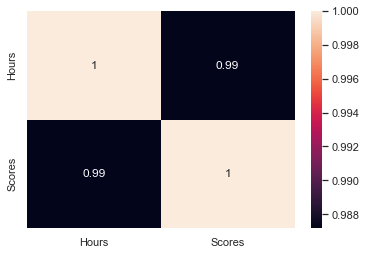

In [65]:
sns.heatmap(df.corr(), annot=True)

<h2>Line Plot</h2>

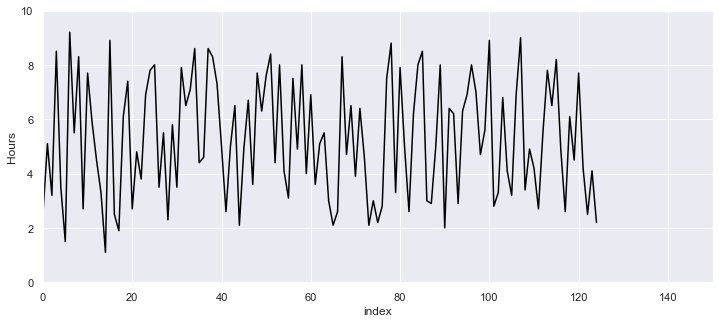

In [66]:
# Plotting with index along the x-axis
df['Hours'].plot(figsize=(12, 5), color='black') # color and figsize changed

plt.xlim(0, 150) # range for x-axis
plt.ylim(0, 10) # range for x-axis
plt.xlabel('index')
plt.ylabel('Hours'); # ";" prevents object info from displaying

<h2>Scatter Plot</h2>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

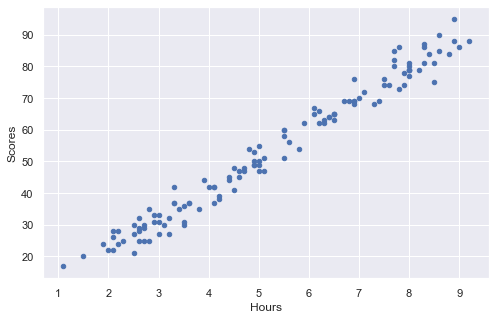

In [67]:
# plotting one variable against the other
df.plot.scatter('Hours', 'Scores', figsize=(8, 5))

# The x and y labels are automatically taken from the column names

<h2>Box Plot</h2>

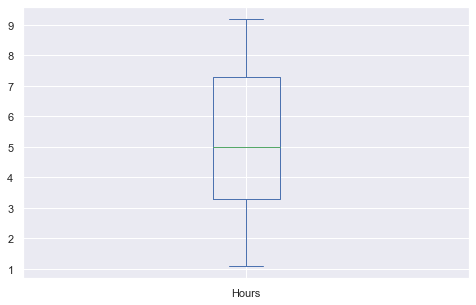

In [68]:
# Box plot of a column
df['Hours'].plot.box(figsize=(8, 5));

<AxesSubplot:>

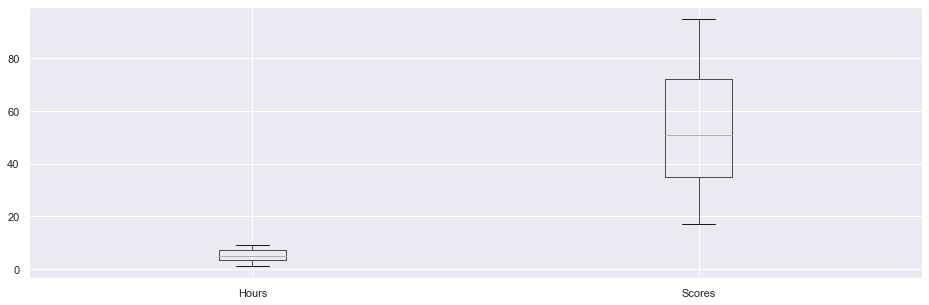

In [69]:
# Box plot of all the columns with numerical data
df.boxplot(figsize=(16, 5)) # or df.plot.box()

<h2>Histogram</h2>

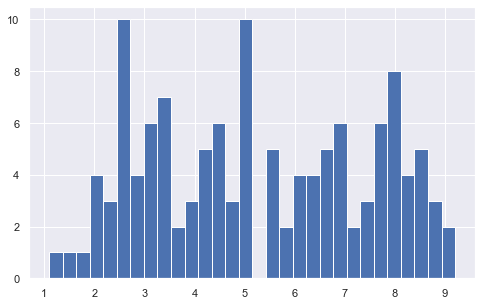

In [70]:
df['Hours'].hist(bins=30, figsize=(8, 5)); # we can specify the number of bins

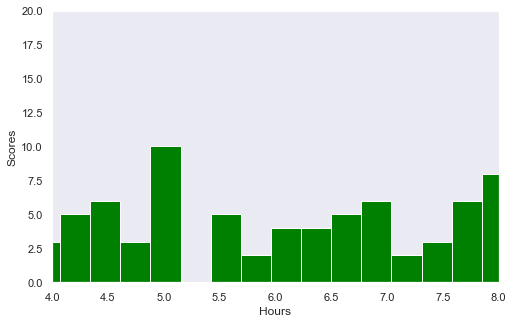

In [71]:
ax = df['Hours'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('Hours')
ax.set_ylabel('Scores')

ax.set_xlim(4, 8) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 20); # limiting display range to 0-120 for the y-axis

<h2>Bar Plot</h2>

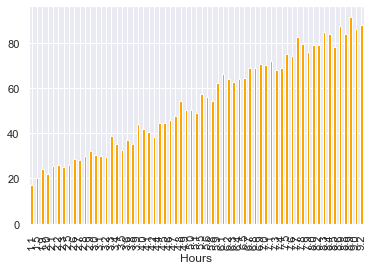

In [72]:
df_avg_BP = df.groupby('Hours')['Scores'].mean()
df_avg_BP[:10].plot.bar(color='orange');

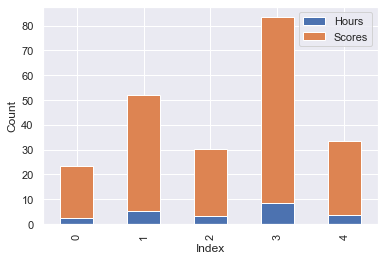

In [73]:
# To stack values from multiple columns
ax = df[['Hours', 'Scores']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

<h2>Multiple Plots</h2>

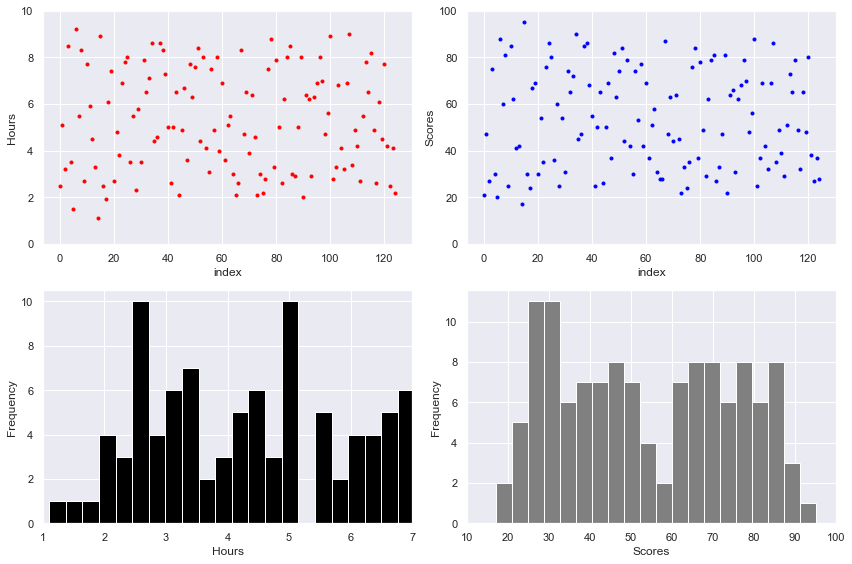

In [74]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['Hours'].plot(ax = axes[0][0], style='.', color='red') # top left
df['Scores'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['Hours'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['Scores'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')

axes[0][0].set_ylabel('Hours')
axes[0][1].set_ylabel('Scores')

axes[1][0].set_xlabel('Hours')
axes[1][1].set_xlabel('Scores')

axes[0][0].set_ylim(0, 10)
axes[0][1].set_ylim(0, 100)

axes[1][0].set_xlim(1, 7)
axes[1][1].set_xlim(10, 100)

fig.tight_layout()